### Loan prediction 

### Random forest

In [47]:
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report
 

In [48]:
df = pd.read_csv("loan_train_data.csv")

In [49]:
df.Gender.value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [50]:
for col in ['Gender','Married','Education','Self_Employed','Property_Area','Dependents']:
    df[col].fillna(df[col].mode()[0],inplace=True)
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])

C:\Users\Aditi k\AppData\Local\Temp\ipykernel_3732\4264200240.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)
C:\Users\Aditi k\AppData\Local\Temp\ipykernel_3732\4264200240.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(7), object(2)
memory usage: 62.5+ KB


In [52]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})

C:\Users\Aditi k\AppData\Local\Temp\ipykernel_3732\2530277826.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
C:\Users\Aditi k\AppData\Local\Temp\ipykernel_3732\2530277826.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [53]:
#KDE plot
# check for skewness

In [54]:
cols= ['Gender','Married','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Dependents']
X,y=df[cols],df['Loan_Status']
#X=df.drop(columns=['Loan_Status'])
#y=df['Loan_Status']
scaler=StandardScaler()
X[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]=scaler.fit_transform(X[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])

C:\Users\Aditi k\AppData\Local\Temp\ipykernel_3732\16665939.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]=scaler.fit_transform(X[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])


In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)
param = {'n_estimators':[50,100],'max_depth':[3,5],'class_weight':['balanced']}
clf=GridSearchCV(RandomForestClassifier(random_state=42),param,scoring='recall',cv=5)
clf.fit(X_train,y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'class_weight': ['balanced'], 'max_depth': [3, 5], 'n_estimators': [50, 100]}"
,scoring,'recall'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [56]:
y_pred=clf.predict(X_test)
print("Best paramters:",clf.best_params_)
print(classification_report(y_test,y_pred))

Best paramters: {'class_weight': 'balanced', 'max_depth': 3, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.91      0.55      0.69        38
           1       0.83      0.98      0.90        85

    accuracy                           0.85       123
   macro avg       0.87      0.76      0.79       123
weighted avg       0.86      0.85      0.83       123



Text(50.722222222222214, 0.5, 'Actual')

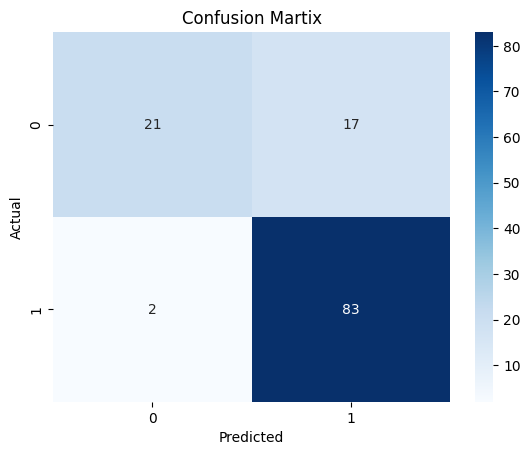

In [57]:
import seaborn as sns 
import matplotlib.pyplot as plt
corr=sns.heatmap(pd.crosstab(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Martix')
plt.xlabel('Predicted')
plt.ylabel("Actual")

In [58]:

from sklearn.metrics import accuracy_score


print("Accuracy_score", accuracy_score(y_test,y_pred)*100)

Accuracy_score 84.5528455284553
